**This file should take as input the following:**

- long_positions, short_positions: each is a list of tuples. Each tuple has the entry and exit index as a timestamp
- Price
- fees

**It returns estimations about the return**

## Script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

def get_trade_return(position, trade_type,price,fees):
    entry_price = price[position[0]]
    if len(position) == 3:
        exit_price = position[2]
    else:
      exit_price = price[position[1]]
    fees = entry_price * fees + exit_price * fees
    m = 1 if trade_type == "long" else -1
    return ((exit_price - entry_price) * m - fees) / entry_price * 100

def get_trade_duration(position):
    return (position[1] - position[0]).seconds / 60

def create_trade_df(long_positions, short_positions, price, fees = 0.001):
    trade_data = []

    def prepare_trades(positions, trade_type):
        for position in positions:
            trade_return = get_trade_return(position, trade_type,price,fees)
            duration = get_trade_duration(position)
            trade_data.append([position[0], trade_return, duration, trade_type])

    prepare_trades(long_positions, 'long')
    prepare_trades(short_positions, 'short')

    trades = pd.DataFrame(trade_data, columns=['entry_date', 'return', 'duration', 'type'])

    trades.set_index('entry_date', inplace=True)
    trades.sort_index(inplace=True)

    return trades

def value_estimation(observations, variable_name):

    print(f"\nEstimation for: {variable_name}")
    lower_bound = observations.quantile(0.025)
    upper_bound = observations.quantile(0.975)
    print(f"The 95% confidence interval of the observations is approximately from {lower_bound:.2f} to {upper_bound:.2f}.\n")
    mean_value = observations.mean()
    plt.figure(figsize=(5, 3))
    sns.kdeplot(observations, bw_adjust=0.5, fill=True)
    plt.axvline(mean_value, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.legend()
    plt.show()

def return_estimations(trades_df):
  value_estimation(trades_df["return"],"Return per trade")
  value_estimation(trades_df["return"].resample('D').sum(),"Return per day")
  value_estimation(((trades_df["return"] / 100 + 1).resample('D').prod() - 1) * 100,"Exp return per day")

  value_estimation(trades_df["return"].resample('W').sum(),"Return per week")
  value_estimation(((trades_df["return"] / 100 + 1).resample('W').prod() - 1) * 100,"Exp return per week")

  value_estimation(trades_df["return"].resample('M').sum(),"Return per month")
  value_estimation(((trades_df["return"] / 100 + 1).resample('M').prod() - 1) * 100,"Exp return per month")

def exc(long_positions, short_positions, price, fees = 0.001):
   trades = create_trade_df(long_positions, short_positions, price)
   return_estimations(trades)

## DEV

In [ ]:
import sys
sys.path.append('drive/MyDrive/Colab Notebooks/Trading Bot')
import Utils.ML_usage as st
from importlib import reload
reload(st)

<module 'Utils.ML_usage' from '/content/drive/MyDrive/Colab Notebooks/Trading Bot/Utils/ML_usage.py'>

In [2]:
# Get data to test on
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Trading Bot/Data/Crypto/SOL/SOLUSDT-5m-2022-2023-labeled")
df.index = pd.to_datetime(df["Date"])
df.drop(columns = ["Date"],inplace = True)
df.sort_index(inplace = True)

In [3]:
!pip install lightweight_charts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.9/405.9 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 10.6 MB/s eta 0:00:00
  Created wheel for proxy-tools: filename=proxy_tools-0.1.0-py3-none-any.whl size=2902 sha256=95d609a6dcd3305e0010cb8eaf46f4b09601422b8861621c50cbd4b0fea566ca
  Stored in directory: /root/.cache/pip/wheels/09/85/c8/5320d6985060fd2f9b33e61f4496824be3d2b3566853c55955
Successfully built proxy-tools


In [7]:
df["da"] = df.index

In [11]:
df.columns = df.columns.str.lower()

In [13]:
from lightweight_charts import Chart

df = pd.read_csv("ohlcv.csv")

chart = Chart()

chart.set(df[:10])
chart.show(block=True)

KeyboardInterrupt: 

In [ ]:
values = [0, 1, 2]
probabilities = [0.4, 0.3, 0.3]
ml_pred = pd.Series(np.random.choice(values, size=len(df), p=probabilities))

In [ ]:
long_positions, short_positions = st.exc(ml_pred, df)

In [ ]:
trades = create_trade_df(long_positions, short_positions, df.Open)


Estimation for: Return per trade
The 95% confidence interval of the observations is approximately from -1.00 to 1.20.



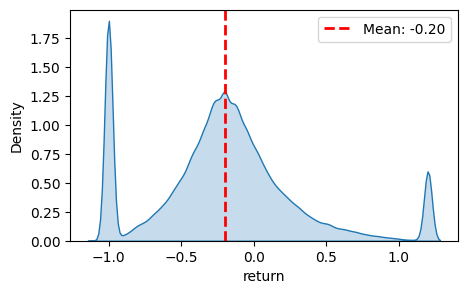


Estimation for: Return per day
The 95% confidence interval of the observations is approximately from -32.69 to -8.74.



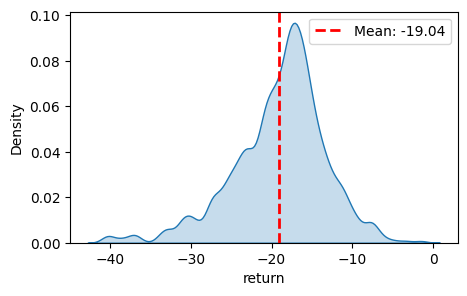


Estimation for: Exp return per day
The 95% confidence interval of the observations is approximately from -28.04 to -8.60.



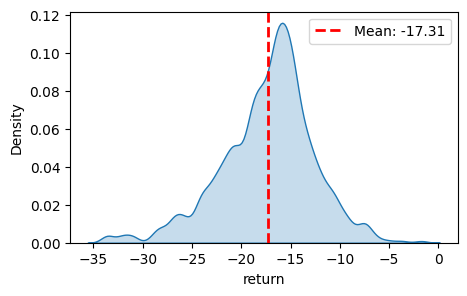


Estimation for: Return per week
The 95% confidence interval of the observations is approximately from -168.16 to -102.10.



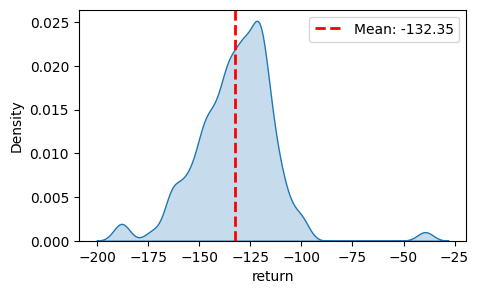


Estimation for: Exp return per week
The 95% confidence interval of the observations is approximately from -81.69 to -64.34.



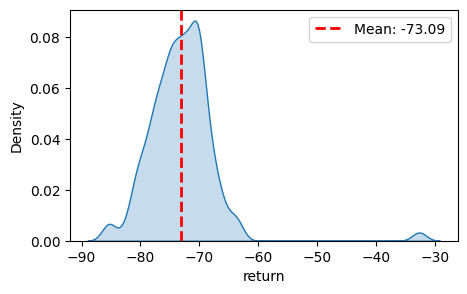


Estimation for: Return per month
The 95% confidence interval of the observations is approximately from -647.39 to -503.02.



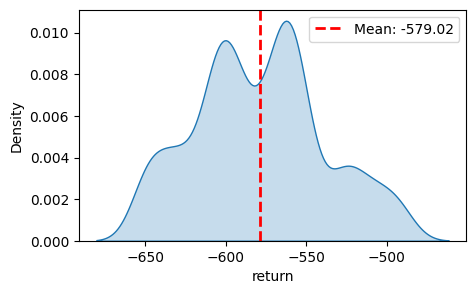


Estimation for: Exp return per month
The 95% confidence interval of the observations is approximately from -99.85 to -99.36.



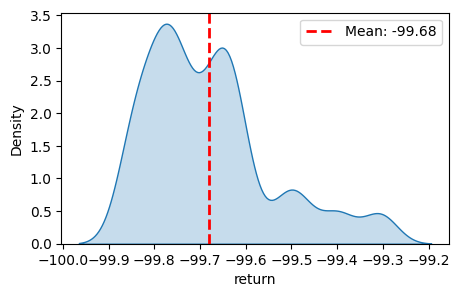

In [ ]:
return_estimations(trades)

In [ ]:
exc(long_positions, short_positions, df.Open, fees = 0.001)